## PROJECT FINAL ANALYSIS

In [1]:
import pandas as pd
import numpy as np

In [2]:
# orders_qu.csv (quality controlled)
url = "https://drive.google.com/file/d/17HZn-NY3Ph56-DLPcECTiFxgIOCOfpd6/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv (quality controlled)
url = "https://drive.google.com/file/d/1B6x5XHUjGmOz0gvenuWltPVSOkxqh8dA/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv (cleaned)
url = "https://drive.google.com/file/d/1KzLNMAhr6kaSO48iPFRQRr-D9rz_zSAV/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands_cl.csv
url = "https://drive.google.com/file/d/1lt9WKBMOCuMqMU66rG9b_q4h0c5PrJmB/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [3]:
o = orders_qu.copy()
o.head(1)

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed


In [4]:
ol = orderlines_qu.copy()
ol.head(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16


In [5]:
b = brands.copy()
b.head(1)

,short,long
0,8MO,8Mobility


In [6]:
## Checking orders
o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      40985 non-null  int64  
 1   created_date  40985 non-null  object 
 2   total_paid    40985 non-null  float64
 3   state         40985 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [7]:
o.duplicated().sum()

0

In [8]:
## Converting datatypes
o["created_date"] = pd.to_datetime(o["created_date"])

In [9]:
## Checking orderlines
ol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 2.8+ MB


In [10]:
ol.duplicated().sum()

0

In [11]:
## Converting datatypes
ol["date"] = pd.to_datetime(ol["date"])

## CREATING CATEGORIES

In [12]:
pp_df=products_cl.copy()
pp_df["category"]=""
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
 6   category  9992 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 546.6+ KB


In [13]:
## Deleting 46 missing Type values
pp_df=pp_df.loc[~pp_df.type.isna(), :]

In [14]:
# TYPE       CATEGORY

##### COMPUTERS: Macbook, iMac, desktop
# 1282       Macbook, iMac
# 1,02E+12   Macbook
# 2158       Macbook
# 2,16E+11   iMac
# 5,74E+15   iMac
# 5,43E+15   iMac
# 118692158  iMac


##### TELEPHONY (All the types ending with 1716  )
# 51601716   iPhone
# 85641716   iPhone
# 24811716   iPhone
# 1716       iPhone
# 113281716  iPhone
# 24821716   iPhone
# 113291716  iPhone
# 85651716   iPhone
# 21571716   iPhone


##### AUDIO : headphone, speaker
# 5384       headphone
# 5398       speaker


##### ACCESSORIES : Case/protector, Charger,  Adapter, Cable
## Case/protector (All the types ending with 5403 )
# 11865403   iPhone case/protector
# 12635403   iPad case/protector
# 13835403   Macbook case/bag
# 13555403   screen protector

## Charger (Types ending with 5399  )
# 13615399   charger, charging dock
# 13005399   charger
# 5399       charger

# 1325       adapter, cable



##### STORAGE : Server,memory card, hard disk, hard drive, network storage
# 12175397   server, network storage
# 11935397   storage
# 12215397   storage
# 57445397   memory card, usb flash drive
# 12655397   hard drive, hard disk
# 12995397   
# 1364       Macbook memory



##### TABLETS
# Types ending with 714: iPad


##### OTHERS ?
# 1515       battery
# 1296       monitor
# 1231       AppleCare Protection Plan
# 1433       upgrade/expansion kit
# 1,44E+11   repair service
# 2449       watch band/strap
# 1229       pointer
# 1405       graphical touch tablet 
# 101781405  graphical touch tablet 
# 12585395   usb hub, other adapters
# 11905404   ?
# 1298       ?
# 1334       ?


In [15]:
pp_df.loc[pp_df['type'].isin(['11865403']),"category"] += ',phone_case'
pp_df.loc[pp_df['type'].isin(['12175397']),"category"] += ',server'
pp_df.loc[pp_df['type'].isin(['1298']),"category"] += ',open'
pp_df.loc[pp_df['type'].isin(['11935397']),"category"] += ',storage'
pp_df.loc[pp_df['type'].isin(['11905404']),"category"] += ',iot'
pp_df.loc[pp_df['type'].isin(['1282']),"category"] += ',computer'
pp_df.loc[pp_df['type'].isin(['12635403']),"category"] += ',ipad_case'
pp_df.loc[pp_df['type'].isin(['13835403']),"category"] += ',laptop_case'
pp_df.loc[pp_df['type'].isin(['5,74E+15']),"category"] += ',imac'
pp_df.loc[pp_df['type'].isin(['1364']),"category"] += ',RAM'
pp_df.loc[pp_df['type'].isin(['12585395']),"category"] += ',adapter'
pp_df.loc[pp_df['type'].isin(['1296']),"category"] += ',monitor'
pp_df.loc[pp_df['type'].isin(['1325']),"category"] += ',cable'
pp_df.loc[pp_df['type'].isin(['5384']),"category"] += ',headphones'
pp_df.loc[pp_df['type'].isin(['1433']),"category"] += ',SSD'
pp_df.loc[pp_df['type'].isin(['12215397']),"category"] += ',SSD_hard_drive'
pp_df.loc[pp_df['type'].isin(['5398']),"category"] += ',speakers'
pp_df.loc[pp_df['type'].isin(['1,02E+12']),"category"] += ',macbook_pro'
pp_df.loc[pp_df['type'].isin(['1,44E+11']),"category"] += ',repair'
pp_df.loc[pp_df['type'].isin(['57445397']),"category"] += ',memory card'
pp_df.loc[pp_df['type'].isin(['1334']),"category"] += ',wifi'
pp_df.loc[pp_df['type'].isin(['2158']),"category"] += ',touch_bar'
pp_df.loc[pp_df['type'].isin(['2449']),"category"] += ',smartphone_acc'
pp_df.loc[pp_df['type'].isin(['12655397']),"category"] += ',hard_drive'
pp_df.loc[pp_df['type'].isin(['1229']),"category"] += ',pointers'
pp_df.loc[pp_df['type'].isin(['12995397']),"category"] += ',dock/expander'
pp_df.loc[pp_df['type'].isin(['1515']),"category"] += ',battery'
pp_df.loc[pp_df['type'].isin(['13615399']),"category"] += ',charger'
pp_df.loc[pp_df['type'].isin(['5399']),"category"] += ',charger'
pp_df.loc[pp_df['type'].isin(['13555403']),"category"] += ',screen_savers'
pp_df.loc[pp_df['type'].isin(['1405']),"category"] += ',tablet'

pp_df.loc[pp_df["desc"].str.lower().str.contains("keyboard"), "category"] += ",keyboard"
pp_df.loc[pp_df["name"].str.lower().str.contains("^.{0,7}apple iphone"), "category"] += ",iphone"
pp_df.loc[pp_df["type"].str.contains("1716$", regex = True), "category"] = ",iphone"
pp_df.loc[pp_df["type"].str.contains("704$", regex = True), "category"] = ",tablet"
pp_df.loc[pp_df["name"].str.lower().str.contains("^.{0,7}apple ipod"), "category"] += ",ipod"
pp_df.loc[pp_df["name"].str.lower().str.contains("^.{0,7}apple ipad|tablet"), "category"] += ",tablet"
pp_df.loc[pp_df["name"].str.lower().str.contains("imac|mac mini|mac pro"), "category"] += ",desktop"

In [16]:
pp_df.loc[(pp_df['name'].str.lower().str.contains('backpack'))|(pp_df['desc'].str.lower().str.contains('backpack')),'category']+=',backpack'
pp_df.loc[(pp_df["desc"].str.lower().str.contains("^.{0,12}apple watch"))&(~pp_df['desc'].str.lower().str.contains('support')),'category']+=',smartwatch'
pp_df.loc[(pp_df['name'].str.lower().str.contains('mouse'))&(~pp_df['name'].str.lower().str.contains('^Apple iMac')),'category']+=',mouse'
pp_df.loc[pp_df['name'].str.lower().str.contains('drone'),'category']+=',drone'
pp_df.loc[pp_df['name'].str.lower().str.contains('camera'),'category']+=',camera'

In [17]:
 #accessory cats
 pp_df.loc[pp_df['desc'].str.lower().str.contains('refurbished'),'category']+=',refurbished'
 pp_df.loc[pp_df['desc'].str.lower().str.contains('repair'),'category']+=',repair'
 pp_df.loc[pp_df['name'].str.lower().str.contains('open -'),'category']+=',like_new'

In [18]:
 #other
 pp_df.loc[pp_df['category']=='','category'] += ',other'

In [19]:
pp_df['category'].value_counts()

,other                        1581
,phone_case                   1012
,server                        929
,open,like_new                 531
,storage                       521
                              ... 
,open,smartwatch,like_new        1
,iot,drone,like_new              1
,SSD,refurbished,like_new        1
,ipad_case,refurbished           1
,wifi,refurbished,like_new       1
Name: category, Length: 112, dtype: int64

In [20]:
## Renaming columns
# since these categories are more like sub-categories, we can call it sub-category maybe
pp_df = pp_df.rename(columns={"category" : "subcategory"})
pp_df.head(1)

,sku,name,desc,price,in_stock,type,subcategory
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,",other"


In [21]:
## Deleting just first comma in subcategory column
pp_df["subcategory"] = pp_df["subcategory"].str[1:]

In [22]:
# creating new category column
# and here our main category column
pp_df["category"] = ""

In [23]:
## filling category column
## COMPUTERS: Macbook, iMac, desktop | TELEPHONY: iPhone, smartphone | AUDIO : headphone, speaker | ACCESSORIES: Case/protector, Charger, Adapter, Cable
## STORAGE: Server, memory card, hard disk, hard drive, network storage

pp_df.loc[pp_df["type"].isin(["13615399", "13005399", "5399", "1325"]), "category"] = "accessories"
pp_df.loc[pp_df["type"].str.contains("5403$", regex = True), "category"] = "accessories"
pp_df.loc[pp_df["type"].isin(["1282", "1,02E+12", "2158", "2,16E+11", "5,74E+15", "5,43E+15", "118692158"]), "category"] = "computers"
pp_df.loc[pp_df["type"].str.contains("1716$", regex = True), "category"] = "telephony"
pp_df.loc[pp_df["type"].isin(["5384", "5398"]), "category"] = "audio"
pp_df.loc[pp_df["type"].isin(["12175397", "11935397", "12215397", "57445397", "12655397", "12995397", "1364"]), "category"] = "storage"

pp_df.loc[pp_df["category"] == "", "category"] = "other"

pp_df.sample(10)

,sku,name,desc,price,in_stock,type,subcategory,category
7365,APP2286,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13 inch Touch Bar 33 GHz Core ...,2869.00,0,"1,02E+12",macbook_pro,computers
136,WDT0139,"Red 1TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 1T...,77.00,0,12655397,hard_drive,storage
5489,LIF0095-A,Open - Lifeproof nüüd Waterproof Case iPad Min...,Waterproof protective cover and extreme condit...,109.99,0,1298,"open,like_new",other
5787,SAT0007,Satechi USB Hub Slim-C to USB-A / HDMI 4K / US...,Aluminum Hub USB Type-C 4K HDMI and two USB Ty...,79.99,0,12585395,adapter,other
7312,PAC2116,"Apple iMac 27 ""Core i5 Retina 5K 38GHz | 64GB ...",IMac desktop computer 27 inch 5K Retina 64GB R...,4399.00,0,"5,74E+15",imac,computers
967,APP0834,Apple iPhone 6 Plus Case Blue,Ultrathin silicone case and microfiber premium.,39.00,0,11865403,phone_case,accessories
4210,APP1539,Apple Smart Cover iPad Mini 4 Light Pink,Polyurethane Smart Cover iPad Mini 4,45.00,0,12635403,ipad_case,accessories
7287,APP2216,"Apple iMac 27 ""Core i5 3.4GHz Retina 5K | 8GB ...",IMac desktop computer 27 inch 5K Retina 8GB RA...,2219.00,0,"5,74E+15",imac,computers
6715,AP20023,"Second hand - Apple iMac 215 ""Core i5 Quad-Cor...",IMac used i5 215 inch quad-core 27GHz | 8GB RA...,939.00,0,1282,computer,computers
9870,BOS0069,Bose Bluetooth Headset Orange Free SoundSport,Bose Bluetooth headset with reloadable sheath ...,199.00,1,5384,headphones,audio


## CREATING COMPREHENSIVE DATAFRAME

In [24]:
## merging orderlines, orders, products table
df = pd.merge(ol,o, how="inner", left_on="id_order" , right_on="order_id").merge(pp_df, how="inner", on="sku")

In [25]:
df.head(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,state,name,desc,price,in_stock,type,subcategory,category
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,299545,2017-01-01 01:51:47,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,other,other


In [26]:
## Creating brand "short" column
df["short"] = df["sku"].str[:3]

In [27]:
## Merging brands table
df = pd.merge(df, brands, how="inner", on="short")
df.sample(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,state,name,desc,price,in_stock,type,subcategory,category,short,long
42796,1241349,352554,0,1,ZAG0028,59.99,2017-05-04 11:21:39,352554,2017-05-04 11:43:14,103.95,Completed,Zagg keyboard Messenger Case iPad Air / Air 2 ...,skinny sleeve with bluetooth keyboard and adju...,69.99,0,12575403,other,accessories,ZAG,ZaggKeys


In [28]:
## Creating new unit_price_total column (revenue)
df["revenue"] = df.unit_price * df.product_quantity

In [29]:
## Creating new discount column = price-unitprice
df["discount"] = (df.price - df.unit_price)

In [30]:
## Creating new discount_rate column
df['discount_rate'] = (df.discount / df.price * 100)

In [31]:
## Deleting unnecessary columns
df.drop("created_date", axis=1, inplace=True)
df.drop("id_order", axis=1, inplace=True)
df.drop("product_id", axis=1, inplace=True)
df.drop("state", axis=1, inplace=True)
df.drop("id", axis=1, inplace=True)
df.drop("short", axis=1, inplace=True)

In [32]:
## Renaming columns
df = df.rename(columns={'product_quantity': 'quantity'})
df = df.rename(columns={'long': 'brand'})

In [33]:
df.head(1)

,quantity,sku,unit_price,date,order_id,total_paid,name,desc,price,in_stock,type,subcategory,category,brand,revenue,discount,discount_rate
0,1,OWC0100,47.49,2017-01-01 01:46:16,299545,51.48,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,other,other,OWC,47.49,13.5,22.134776


In [34]:
## using round()
df["price"] = df["price"].round()
df["unit_price"] = df["unit_price"].round()
df["revenue"] = df["revenue"].round()
df["discount"] = df["discount"].round()
df["discount_rate"] = df["discount_rate"].round()

## CHECKIING DATA

In [35]:
df.groupby("category").agg({"sku" : "count"})

,sku
category,
accessories,10360
audio,3100
computers,174
other,24147
storage,13140
telephony,2263


In [36]:
df[df["sku"]=="LGE0044"].head()

,quantity,sku,unit_price,date,order_id,total_paid,name,desc,price,in_stock,type,subcategory,category,brand,revenue,discount,discount_rate
19265,1,LGE0044,580.0,2017-01-05 19:27:47,303341,579.99,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",99% Professional Monitor sRGB color calibrator...,599.0,1,1296,monitor,other,LG,580.0,19.0,3.0
19266,2,LGE0044,580.0,2017-01-08 17:42:34,304865,1159.98,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",99% Professional Monitor sRGB color calibrator...,599.0,1,1296,monitor,other,LG,1160.0,19.0,3.0
19267,1,LGE0044,580.0,2017-01-09 09:26:28,305458,579.99,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",99% Professional Monitor sRGB color calibrator...,599.0,1,1296,monitor,other,LG,580.0,19.0,3.0
19268,1,LGE0044,580.0,2017-01-09 11:54:49,305596,579.99,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",99% Professional Monitor sRGB color calibrator...,599.0,1,1296,monitor,other,LG,580.0,19.0,3.0
19269,2,LGE0044,580.0,2017-01-09 18:57:03,305973,1237.97,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",99% Professional Monitor sRGB color calibrator...,599.0,1,1296,monitor,other,LG,1160.0,19.0,3.0


In [37]:
df[df["category"]=="other"].groupby("sku").agg({"quantity" : "sum"}).sort_values(by= "quantity", ascending=False).head(10)

,quantity
sku,
APP1190,955
APP0698,820
NTE0013,252
WAC0171,246
LGE0044,239
MAT0010,237
APP1214,220
SAT0054,206
NTE0062,196


In [78]:
df[df["category"]=="other"].sample(20)

,quantity,sku,unit_price,date,order_id,total_paid,name,desc,price,in_stock,...,category,brand,revenue,discount,discount_rate,unit_price category,year,month,day,month_year
11031,1,APP2149,686.0,2017-11-24 18:57:54,440843,685.59,"Apple iPad Pro 10.5 ""Wi-Fi 64GB Silver",Pro New iPad 64GB Wi-Fi,729.0,0,...,other,Apple,686.0,43.0,6.0,600-700,2017,November,24,2017-11-01
51550,2,MAT0010,70.0,2018-01-02 12:07:46,479464,139.98,Matias numeric keyboard + Spanish Aluminio Plata,Keyboard cable compatible with Mac features,70.0,1,...,other,Matias,140.0,0.0,0.0,0-100,2018,January,2,2018-01-01
43940,1,REP0239,60.0,2017-12-27 13:52:42,473396,69.89,battery repair iPhone 6,Repair service including parts and labor for i...,60.0,0,...,other,Repair,60.0,0.0,0.0,0-100,2017,December,27,2017-12-01
27950,1,PHI0069,33.0,2017-01-08 17:20:04,304859,55.97,Philips Hue White 9.5W E27 A60 Single + Dimmer...,Independent bulb set white + remote control fo...,40.0,1,...,other,Philips,33.0,7.0,17.0,0-100,2017,January,8,2017-01-01
22471,1,IFX0181,70.0,2018-01-20 20:28:46,495231,226.16,"Battery iFixit MacBook Pro 13 ""(Mid 2009 to Mi...",Internal Battery for MacBook Pro 13-inch (Mid ...,90.0,1,...,other,iFixit,70.0,20.0,22.0,0-100,2018,January,20,2018-01-01
51506,1,MAT0009,99.0,2017-12-01 14:04:25,453227,102.99,Matias Bluetooth keyboard Aluminum + Spanish n...,Aluminum Bluetooth keypad manages 4 devices si...,120.0,0,...,other,Matias,99.0,21.0,17.0,0-100,2017,December,1,2017-12-01
27734,1,PHI0079,59.0,2017-04-21 09:16:55,348109,121.97,Philips Hue White and Color Light Bulb 10W A60...,Independent bulb color and white for Philips H...,60.0,1,...,other,Philips,59.0,1.0,2.0,0-100,2017,April,21,2017-04-01
51983,1,ALL0008,10.0,2018-01-07 22:39:40,484643,55.96,Allocacoc PowerCube Original Regleta White / Blue,Wall socket cube-shaped 5 to 250V electrical o...,13.0,1,...,other,Allocacoc,10.0,3.0,23.0,0-100,2018,January,7,2018-01-01
6050,1,APP1190,56.0,2017-04-27 10:01:42,350246,55.99,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.0,1,...,other,Apple,56.0,14.0,20.0,0-100,2017,April,27,2017-04-01
7942,1,APP1489,599.0,2018-01-29 17:32:56,501320,605.99,"Apple iPad Pro 9.7 ""128GB Wi-Fi Gray Space",9.7-inch Apple iPad Pro 128GB Wi-Fi Gray Space.,789.0,0,...,other,Apple,599.0,190.0,24.0,500-600,2018,January,29,2018-01-01


## CHECKING DATA - FINISHED

## CATEGORY BASED ANALYSIS

In [39]:
category_df1 = df.groupby("category", as_index=False).agg({"quantity" : "sum", "price" : "mean", "discount" : "mean", "revenue" :"mean", "sku": "count"}).round().sort_values(by="quantity", ascending=False)
category_df1

,category,quantity,price,discount,revenue,sku
3,other,26934,141.0,25.0,125.0,24147
4,storage,15951,201.0,29.0,195.0,13140
0,accessories,11145,49.0,14.0,37.0,10360
1,audio,3418,155.0,34.0,129.0,3100
5,telephony,2323,619.0,50.0,586.0,2263
2,computers,185,973.0,290.0,730.0,174


In [40]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

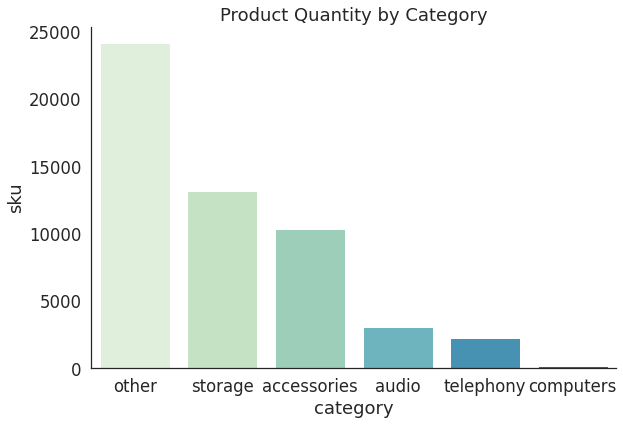

In [41]:
sns.set(font_scale=1.5)
sns.set_style("white")

sns.catplot(kind="bar",
            data=category_df1,
            x="category",
            y="sku",
            height=6,
            aspect=1.5,
            palette="GnBu").set(title="Product Quantity by Category");

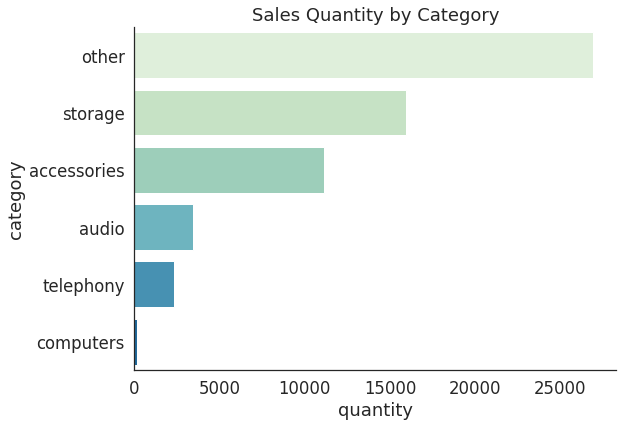

In [42]:
sns.set(font_scale=1.5)
sns.set_style("white")

sns.catplot(kind="bar",
            data=category_df1,
            x="quantity",
            y="category",
            height=6,
            aspect=1.5,
            palette="GnBu").set(title="Sales Quantity by Category");

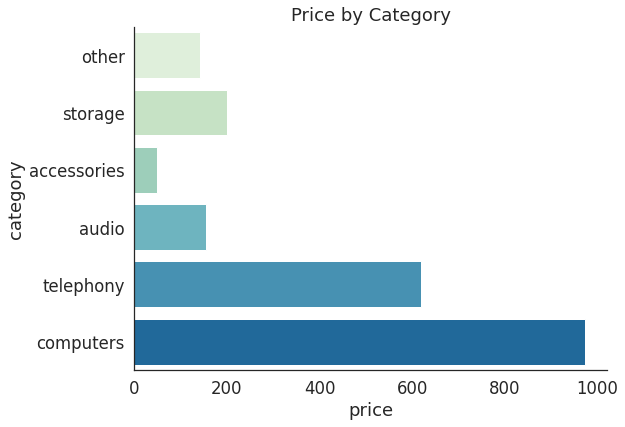

In [43]:
sns.set(font_scale=1.5)
sns.set_style("white")

sns.catplot(kind="bar",
            data=category_df1,
            x="price",
            y="category",
            height=6,
            aspect=1.5,
            palette="GnBu").set(title="Price by Category");

In [44]:
df["unit_price category"] = np.where(df["unit_price"] <= 100, "0-100",
                       np.where(df["unit_price"] <= 200.0, "100-200",
                       np.where(df["unit_price"] <= 300.0, "200-300",
                       np.where(df["unit_price"] <= 400.0, "300-400",
                       np.where(df["unit_price"] <= 500.0, "400-500",
                       np.where(df["unit_price"] <= 600.0, "500-600",
                       np.where(df["unit_price"] <= 700.0, "600-700", "> 700")))))))

In [45]:
unitprice_df1 = df.sort_values(by="unit_price")

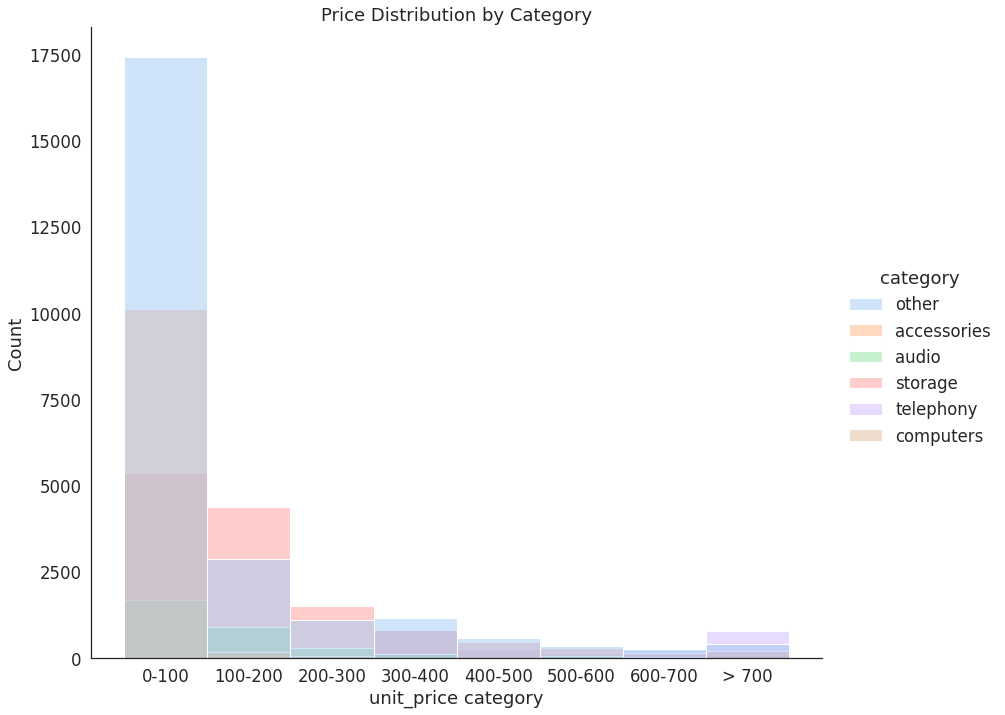

In [46]:
sns.set(font_scale=1.5)
sns.set_style("white")

sns.displot(data=unitprice_df1,
            x="unit_price category",
            hue="category",
            height=10,
            aspect=1.2,
            palette= "pastel").set(title="Price Distribution by Category");

## BRAND BASED ANALYSIS

In [47]:
brand_df1 = df.groupby("brand").agg({"quantity" : "sum", "price" : "sum", "discount" : "sum", "revenue" :"sum", "sku" : "count"}).round().sort_values(by="sku", ascending=False).head(20)
brand_df1.head()

,quantity,price,discount,revenue,sku
brand,,,,,
Apple,11147,2767443.0,279661.0,2573952.0,10174
OWC,3857,523232.0,101070.0,456357.0,3415
Belkin,2279,95346.0,28721.0,71719.0,2116
LaCie,2130,476149.0,49236.0,454264.0,1980
Western Digital,2404,328553.0,60392.0,365434.0,1770


## TIME BASED ANALYSIS

In [48]:
## Finding data date range
## 2017 (January-December)
df.date.min()

Timestamp('2017-01-01 01:46:16')

In [49]:
## 2018 (January_March)
df.date.max()

Timestamp('2018-03-14 11:58:13')

In [50]:
## Creating new year,month columns
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month_name()
df["day"] = df["date"].dt.day
df["month_year"] = df["date"].dt.strftime("%B %Y")
df.head(1)

,quantity,sku,unit_price,date,order_id,total_paid,name,desc,price,in_stock,...,category,brand,revenue,discount,discount_rate,unit_price category,year,month,day,month_year
0,1,OWC0100,47.0,2017-01-01 01:46:16,299545,51.48,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,61.0,1,...,other,OWC,47.0,14.0,22.0,0-100,2017,January,1,January 2017


In [51]:
## SPECIAL DAYS:

## 2017
# Black Friday: 24 November, Cyber Monday: 27 November, Christmas: 25 December, January Sales, Valentine's Day: 14 February

## 2018
# January Sales, Valentine's Day: 14 February

## YEAR BASED

In [52]:
df["month_year"] = pd.to_datetime(df["month_year"])

In [53]:
year_df = df.groupby(["month_year"]).agg({"quantity":"sum", "discount":"mean", "discount_rate":"mean", "revenue":"sum"}).round()
year_df

,quantity,discount,discount_rate,revenue
month_year,,,,
2017-01-01,6846,22.0,25.0,606440.0
2017-02-01,2913,21.0,20.0,326344.0
2017-03-01,246,16.0,19.0,25509.0
2017-04-01,2128,18.0,18.0,230115.0
2017-05-01,2572,20.0,15.0,330862.0
2017-06-01,2050,25.0,17.0,284240.0
2017-07-01,4620,30.0,25.0,601693.0
2017-08-01,3022,28.0,21.0,376196.0
2017-09-01,2788,26.0,20.0,393190.0


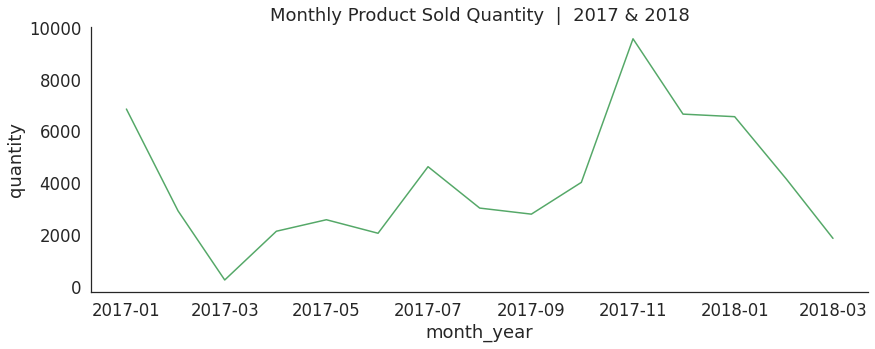

In [54]:
sns.set(font_scale=1.5)
sns.set_style("white")

(
sns.relplot(kind="line",
            data=year_df,
            x="month_year",
            y="quantity",
            height=5,
            aspect=2.5,
            color="g").set(title="Monthly Product Sold Quantity  |  2017 & 2018"));


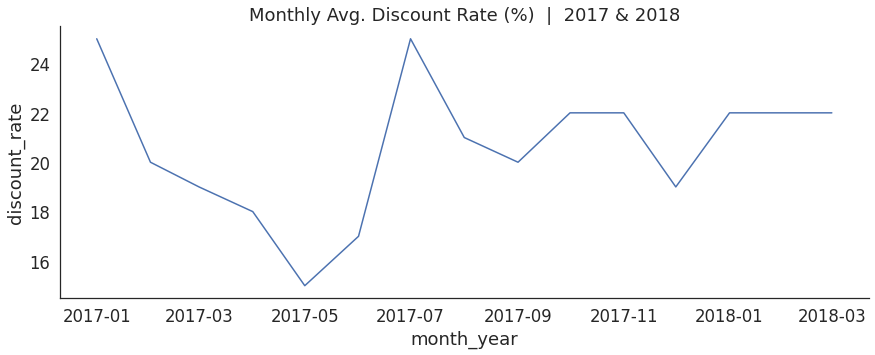

In [55]:
sns.set(font_scale=1.5)
sns.set_style("white")

(
sns.relplot(kind="line",
            data=year_df,
            x="month_year",
            y="discount_rate",
            height=5,
            aspect=2.5,
            color="b").set(title="Monthly Avg. Discount Rate (%)  |  2017 & 2018"));

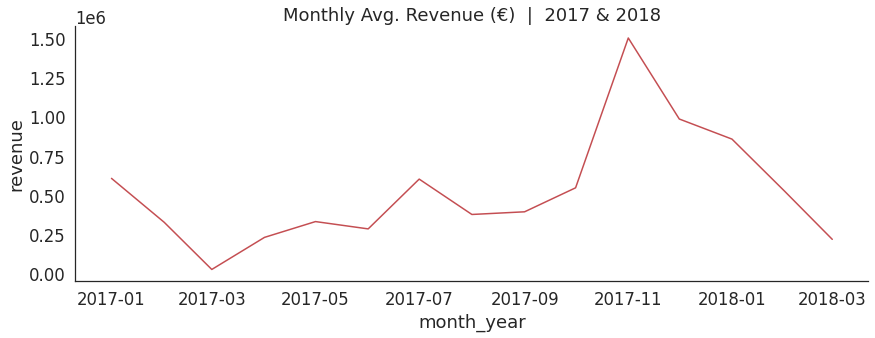

In [56]:
sns.set(font_scale=1.5)
sns.set_style("white")

(
sns.relplot(kind="line",
            data=year_df,
            x="month_year",
            y="revenue",
            height=5,
            aspect=2.5,
            color="r").set(title="Monthly Avg. Revenue (€)  |  2017 & 2018"));

## NOVEMBER BASED

In [57]:
november_df1 = df[df["month"]=="November"].groupby("day").agg({"quantity":"sum", "discount":"mean", "discount_rate":"mean", "revenue":"sum"}).round().sort_values(by="quantity", ascending=False)

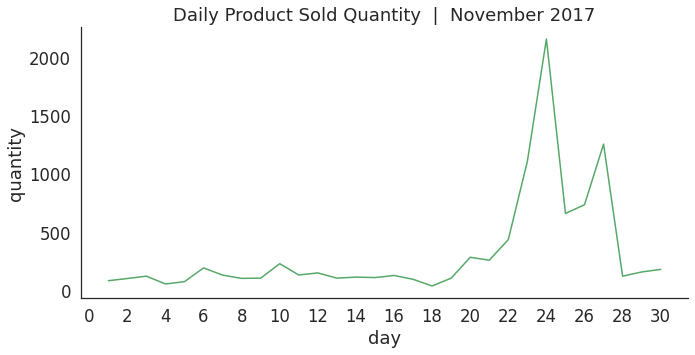

In [58]:
sns.set(font_scale=1.5)
sns.set_style("white")

(
sns.relplot(kind="line",
            data=november_df1,
            x="day",
            y="quantity",
            height=5,
            aspect=2,
            color="g").set(title="Daily Product Sold Quantity  |  November 2017"));


plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]);


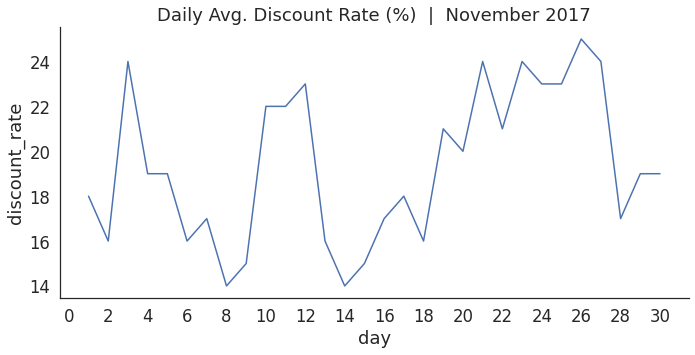

In [59]:
sns.set(font_scale=1.5)
sns.set_style("white")

(
sns.relplot(kind="line",
            data=november_df1,
            x="day",
            y="discount_rate",
            height=5,
            aspect=2,
            color="b").set(title="Daily Avg. Discount Rate (%)  |  November 2017"));


plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]);

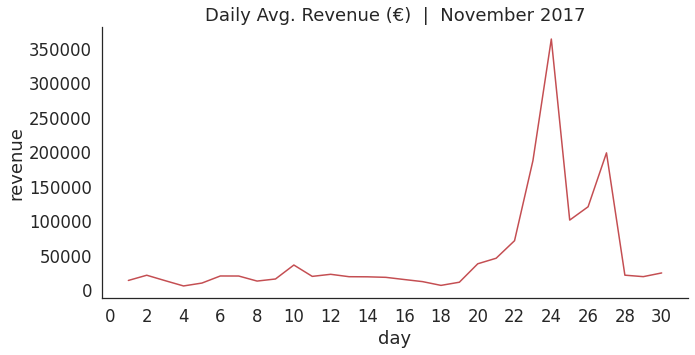

In [60]:
sns.set(font_scale=1.5)
sns.set_style("white")

(
sns.relplot(kind="line",
            data=november_df1,
            x="day",
            y="revenue",
            height=5,
            aspect=2,
            color="r").set(title="Daily Avg. Revenue (€)  |  November 2017"));


plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]);

In [61]:
df[df["month"].isin(["January"])].groupby(["year", "month"]).agg({"quantity":"sum", "price":"mean", "discount":"mean", "revenue":"mean"}).round()

,,quantity,price,discount,revenue
year,month,,,,
2017,January,6846,115.0,22.0,101.0
2018,January,6551,161.0,26.0,146.0


In [62]:
df[df["month"].isin(["February"])].groupby(["year", "month"]).agg({"quantity":"sum", "price":"mean", "discount":"mean", "revenue":"mean"}).round()

,,quantity,price,discount,revenue
year,month,,,,
2017,February,2913,138.0,21.0,127.0
2018,February,4144,158.0,27.0,140.0


## Relationship Between Discount and Revenue

In [63]:
df.sort_values(by="discount", ascending=False).head(1)

,quantity,sku,unit_price,date,order_id,total_paid,name,desc,price,in_stock,...,category,brand,revenue,discount,discount_rate,unit_price category,year,month,day,month_year
23733,1,PAC2067,479.0,2017-07-26 19:41:00,382526,479.0,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",Computer Refurbished iMac 24 inch Core 2 Duo 2...,1799.0,0,...,computers,Pack,479.0,1320.0,73.0,400-500,2017,July,26,2017-07-01


In [64]:
discount_revenue_df = df[df["discount"] > 0]

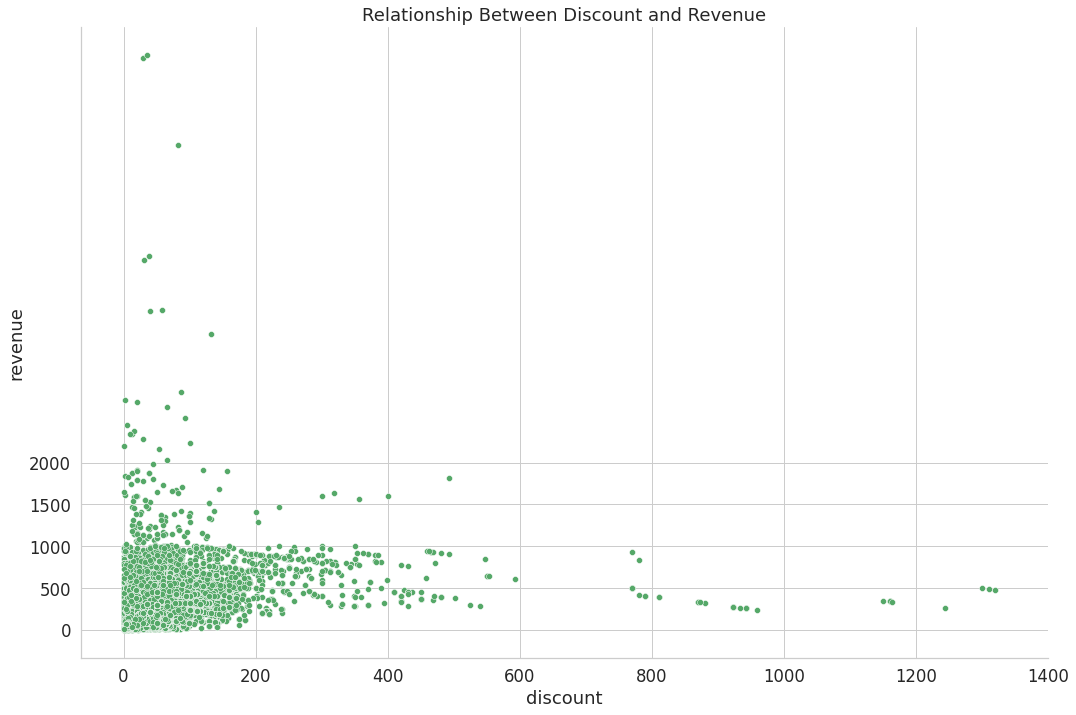

In [65]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

sns.relplot(data=discount_revenue_df,
           x="discount",
           y="revenue",
           height=10,
           aspect=1.5,
           color="g").set(title="Relationship Between Discount and Revenue");

plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400]);
plt.yticks([0, 500, 1000, 1500, 2000]);

In [1]:
sns.set(font_scale=2)
sns.set_style("white")

sns.relplot(data=discount_revenue_df,
           x="discount_rate",
           y="revenue",
           height=10,
           aspect=1,
            hue="category",
           palette="Paired").set(title="Relationship Between Discount Rate and Revenue");

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]);
plt.yticks([0, 500, 1000, 1500, 2000]);

NameError: ignored

In [67]:
# 1282       Macbook, iMac
# 1,02E+12   Macbook
# 2158       Macbook
# 2,16E+11   iMac
# 5,74E+15   iMac
# 5,43E+15   iMac
# 118692158  iMac
# APP2072    Macbook

In [68]:
df[ (df["name"].str.contains("iMac")) & (df["category"]=="other")].sample(10)

,quantity,sku,unit_price,date,order_id,total_paid,name,desc,price,in_stock,...,category,brand,revenue,discount,discount_rate,unit_price category,year,month,day,month_year
1048,1,OWC0052,20.0,2017-07-13 18:49:56,376558,416.95,"OWC SSD installation Kit for iMac 27 ""(2011) w...",SSD installation kit without tools iMac 27-inc...,36.0,1,...,other,OWC,20.0,16.0,44.0,0-100,2017,July,13,2017-07-01
15053,2,SAT0033,29.0,2018-02-02 10:13:36,504233,130.99,Support Satechi Slim MacBook or iMac Aluminum ...,Stand with aluminum finish and practical desig...,50.0,0,...,other,Satechi,58.0,21.0,42.0,0-100,2018,February,2,2018-02-01
1046,1,OWC0052,20.0,2017-06-28 00:12:03,369733,26.98,"OWC SSD installation Kit for iMac 27 ""(2011) w...",SSD installation kit without tools iMac 27-inc...,36.0,1,...,other,OWC,20.0,16.0,44.0,0-100,2017,June,28,2017-06-01
1540,1,OWC0216,45.0,2017-11-06 09:35:29,422433,237.55,OWC Data Doubler Optical Bay Adapter Kit Insta...,SuperDrive replacement tray or SSD hard drive ...,73.0,1,...,other,OWC,45.0,28.0,38.0,0-100,2017,November,6,2017-11-01
90,1,OWC0100,50.0,2017-12-03 17:21:55,454485,56.98,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,61.0,1,...,other,OWC,50.0,11.0,18.0,0-100,2017,December,3,2017-12-01
1537,1,OWC0216,45.0,2017-10-05 17:07:03,408990,74.98,OWC Data Doubler Optical Bay Adapter Kit Insta...,SuperDrive replacement tray or SSD hard drive ...,73.0,1,...,other,OWC,45.0,28.0,38.0,0-100,2017,October,5,2017-10-01
337,1,OWC0054,20.0,2017-08-01 14:36:32,385079,19.99,"OWC SSD installation Kit for iMac 27 ""(2010) w...",SSD installation kit without tools iMac 27-inc...,36.0,0,...,other,OWC,20.0,16.0,44.0,0-100,2017,August,1,2017-08-01
1071,1,OWC0052,20.0,2018-02-05 11:17:57,506123,128.94,"OWC SSD installation Kit for iMac 27 ""(2011) w...",SSD installation kit without tools iMac 27-inc...,36.0,1,...,other,OWC,20.0,16.0,44.0,0-100,2018,February,5,2018-02-01
15032,1,SAT0033,35.0,2017-10-27 11:01:24,418510,41.98,Support Satechi Slim MacBook or iMac Aluminum ...,Stand with aluminum finish and practical desig...,50.0,0,...,other,Satechi,35.0,15.0,30.0,0-100,2017,October,27,2017-10-01
23763,1,PAC0758,133.0,2017-12-04 15:46:37,455082,139.57,Samsung SSD 850 expansion kit EVO 250GB iMac 2...,SSD upgrade kit 250GB iMac 27-inch Mid 2010 wi...,169.0,1,...,other,Pack,133.0,36.0,22.0,100-200,2017,December,4,2017-12-01
